1. Goal Definition
2. Data Description
3. Cleaning, Wrangling & EDA
4. Processing Data
5. Applying the Model
6. Validating the Model
7. Displaying Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('fifa21_male2.csv', sep=",")
df.sample(2)

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
2288,188554,Dani Pacheco,29,70,Spain,Málaga CF,70,LM,LM CM CAM,https://cdn.sofifa.com/players/188/554/20_120.png,...,54+2,54+2,55+2,52+2,46+2,46+2,46+2,52+2,17+2,Male
14366,250827,B. Aveiro,18,58,Portugal,Crystal Palace,60,CAM,CF,https://cdn.sofifa.com/players/250/827/20_120.png,...,40+2,40+2,43+2,41+2,34+2,34+2,34+2,41+2,17+2,Male


### 1. Problem Definition

#### Rank forward players by market value.

### 2. Data Description

##### I check the basic information of the dataset to see the data types, number of missing values, and basic statistics of the numerical features.

In [3]:
# To display all 107 columns.
pd.set_option('display.max_columns', None) 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, ID to Gender
dtypes: float64(10), int64(45), object(52)
memory usage: 14.0+ MB


In [5]:
len(df)

17125

### 3. Cleaning, Wrangling & EDA

##### I check for and handle duplicates, any missing values, and wrong formats in the dataset.

In [6]:
# To check for duplicates of players (IDs). 
df.ID.nunique()
# There's none.

17125

In [7]:
# Transforming header names.
df.columns = df.columns.str.replace(' ', '_')
df.head(1)

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player_Photo,Club_Logo,Flag_Photo,POT,Team_&_Contract,Height,Weight,foot,Growth,Joined,Loan_Date_End,Value,Wage,Release_Clause,Contract,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male


In [8]:
# To set the ID, which is unique as the index.
df = df.set_index('ID')

In [9]:
# To check for missing values displaying only the columns that have any.
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]
print("Columns with missing values:")
print(missing_values)

Columns with missing values:
Club                 23
Position            413
Club_Logo            23
Joined               58
Loan_Date_End     16215
Volleys              58
Curve                58
Agility              58
Balance              58
Jumping              58
Interceptions         7
Positioning           7
Vision               58
Composure           423
Sliding_Tackle       58
A/W                  89
D/W                  89
dtype: int64


In [10]:
# To drop the rows with NaNs in these columns, which I will consider for my model.
df = df.dropna(subset=['Club', 'Position']) 

In [11]:
df['Position'].isna().sum()

0

In [12]:
df['Position'].unique()

array(['LM', 'CM CAM CDM', 'CAM RM RW LM', 'CM CAM', 'RW RM', 'CM CDM',
       'LM CM CAM', 'RB CB RWB', 'CDM CM RB', 'ST', 'GK', 'CDM LB LM',
       'RM RB CM', 'ST CAM', 'CB', 'RM', 'CF ST', 'CAM', 'CDM CM', 'LB',
       'LM ST', 'CM RM RB', 'LM CAM', 'CDM CM RM', 'CM', 'RB', 'ST CF',
       'CM CDM CAM', 'RW', 'CM CDM LM CAM', 'LWB LM LB LW', 'CF',
       'CAM CM RM', 'RM CAM', 'LM CAM RM', 'ST CF RW', 'CDM CM RM RWB',
       'CM CDM ST', 'CAM CM', 'RM LM', 'CAM LM', 'ST LW', 'CDM',
       'CF CAM ST', 'CB CDM', 'CAM ST', 'CAM LB', 'CM CAM RM CDM',
       'CAM CF RW', 'CAM RW', 'LM RM', 'CAM LW', 'CF ST CAM', 'CB LB',
       'CAM ST CM', 'RM LM CDM', 'LM RM ST', 'LB LM CM', 'RM RW',
       'CDM CAM', 'CAM LM RM', 'LW LM ST', 'CF ST RW CAM', 'CAM RM LM ST',
       'ST CAM LM', 'ST CF CAM', 'RB CDM CM', 'RB CM', 'CDM CB', 'CAM CF',
       'CB RB', 'LW CAM', 'ST RW', 'ST LM', 'CM RB LB', 'LB LWB', 'LW RW',
       'RB LB', 'CAM LM CM', 'ST RW CAM RM', 'CM RM', 'LW RM CF',
       'CDM CM

In [13]:
# I filter the dataset to include only players that play forward positions.
forward_positions = ['ST', 'CF', 'RW', 'LW'] 
exclude_positions = ['LWB', 'RWB']
df_forward = df[df['Position'].isin(forward_positions) & ~df['Position'].isin(exclude_positions)]

In [14]:
len(df_forward)

2031

In [15]:
df_forward.Position.unique()

array(['ST', 'RW', 'CF', 'LW'], dtype=object)

In [16]:
# Some numericals are considered categoricals.
# To remove the currency symbol from the string and convert to an int.
def currency_string_to_int(currency_string): 
    currency_string = currency_string.replace('€', '').replace(',', '')
    if currency_string[-1] == 'M':
        return int(float(currency_string[:-1]) * 1000000)
    elif currency_string[-1] == 'K':
        return int(float(currency_string[:-1]) * 1000)
    elif currency_string.isdigit():
        return int(currency_string)
    else:
        return float('nan')

# For the 'Value' column.
df_forward['Value'] = df_forward['Value'].apply(currency_string_to_int) 

In [17]:
# And for the 'Wage' column.
df_forward['Wage'] = df_forward['Wage'].apply(currency_string_to_int)

In [18]:
df_forward['Wage'].unique()

array([ 10000,  15000,      0,   6000,  45000,   5000,  40000,  20000,
        80000,   2000,  19000,    500,  49000,   8000,  25000,  33000,
        30000,  27000,  35000,    550,  41000,  31000,  70000,  50000,
         4000,   1000,   7000,   9000,  18000,  60000,  21000,  12000,
         3000,  26000,  14000, 300000,  24000,  23000,    900,  17000,
        53000,  22000,  81000,  47000,  11000,  13000,  42000, 130000,
       115000,  43000,  36000,  29000,  96000,  28000, 150000,  63000,
          700,    800,  39000, 100000,  51000,    750,  16000,  56000,
       240000,  38000,  32000,  62000,  48000, 125000, 165000,  71000,
        55000, 140000,  65000,  91000, 135000, 190000, 220000,    950,
        34000,  58000,  54000,  46000,  57000, 250000, 160000, 155000,
        52000,  87000,  44000,  59000,    600,  77000, 105000,    850,
        37000,  95000,    650])

In [19]:
df_forward['IR'].unique()

array(['2 ★', '3 ★', '1 ★', '5 ★', '4 ★'], dtype=object)

In [20]:
# To extract the star and convert to int.
df_forward['IR'] = df_forward['IR'].str.extract('(\d+)').astype(int)

##### I explore the distribution of some columns using statistical analysis and visualisation.

In [21]:
df_forward.describe().round()

,Age,OVA,BOV,POT,Growth,Value,Wage,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,IR,PAC,SHO,PAS,DRI,DEF,PHY
count,2031.0,2031.0,2031.0,2031.0,2031.0,2031.0,2031.0,2031.0,2031.0,2031.0,2031.0,2031.0,2021.0,2031.0,2031.0,2021.0,2031.0,2031.0,2031.0,2031.0,2031.0,2031.0,2021.0,2031.0,2021.0,2031.0,2031.0,2021.0,2031.0,2031.0,2031.0,2031.0,2031.0,2030.0,2030.0,2021.0,2031.0,1986.0,2031.0,2031.0,2031.0,2021.0,2031.0,2031.0,2031.0,2031.0,2031.0,2031.0,2031.0,2031.0,2031.0,2031.0,2031.0,2031.0,2031.0,2031.0,2031.0
mean,25.0,66.0,67.0,72.0,6.0,2522258.0,10653.0,297.0,47.0,67.0,64.0,59.0,59.0,271.0,64.0,52.0,45.0,45.0,65.0,327.0,68.0,69.0,66.0,63.0,63.0,327.0,67.0,68.0,63.0,70.0,60.0,265.0,54.0,25.0,66.0,56.0,64.0,61.0,76.0,28.0,26.0,23.0,52.0,10.0,10.0,11.0,10.0,11.0,1616.0,346.0,1.0,68.0,65.0,53.0,64.0,30.0,65.0
std,5.0,7.0,7.0,6.0,6.0,5918227.0,22309.0,42.0,13.0,8.0,12.0,9.0,11.0,44.0,8.0,12.0,13.0,11.0,8.0,42.0,12.0,11.0,11.0,10.0,12.0,38.0,9.0,11.0,11.0,13.0,9.0,41.0,16.0,10.0,10.0,10.0,9.0,10.0,24.0,11.0,10.0,8.0,8.0,3.0,3.0,4.0,3.0,3.0,180.0,37.0,1.0,11.0,8.0,9.0,7.0,8.0,10.0
min,16.0,47.0,48.0,49.0,0.0,0.0,0.0,184.0,21.0,33.0,24.0,26.0,30.0,162.0,38.0,22.0,20.0,20.0,38.0,123.0,24.0,26.0,27.0,32.0,25.0,193.0,41.0,28.0,21.0,26.0,31.0,76.0,15.0,10.0,35.0,31.0,33.0,37.0,32.0,10.0,10.0,10.0,12.0,2.0,2.0,2.0,4.0,2.0,792.0,244.0,1.0,25.0,38.0,30.0,43.0,15.0,28.0
25%,21.0,61.0,62.0,68.0,0.0,325000.0,2000.0,267.0,36.0,62.0,57.0,53.0,52.0,238.0,58.0,43.0,34.0,37.0,60.0,302.0,62.0,63.0,59.0,56.0,56.0,302.0,61.0,62.0,55.0,63.0,54.0,234.0,40.0,18.0,59.0,49.0,58.0,53.0,59.0,20.0,19.0,17.0,47.0,8.0,8.0,8.0,8.0,8.0,1488.0,321.0,1.0,63.0,60.0,46.0,59.0,24.0,58.0
50%,24.0,66.0,67.0,72.0,4.0,750000.0,3000.0,295.0,46.0,67.0,65.0,59.0,60.0,268.0,64.0,52.0,42.0,45.0,65.0,329.0,68.0,69.0,66.0,62.0,65.0,331.0,68.0,68.0,64.0,72.0,60.0,262.0,54.0,23.0,66.0,55.0,64.0,61.0,72.0,26.0,24.0,21.0,52.0,10.0,10.0,11.0,10.0,10.0,1607.0,345.0,1.0,69.0,65.0,52.0,64.0,29.0,66.0
75%,29.0,71.0,72.0,75.0,10.0,2100000.0,10000.0,326.0,57.0,73.0,72.0,65.0,67.0,300.0,69.0,61.0,55.0,53.0,70.0,355.0,75.0,76.0,73.0,69.0,71.0,355.0,74.0,75.0,70.0,79.0,66.0,294.0,67.0,31.0,73.0,62.0,70.0,69.0,91.0,35.0,31.0,27.0,57.0,13.0,13.0,13.0,13.0,13.0,1736.0,370.0,1.0,76.0,71.0,59.0,69.0,35.0,72.0
max,53.0,91.0,91.0,93.0,25.0,80000000.0,300000.0,429.0,87.0,94.0,93.0,87.0,90.0,419.0,91.0,90.0,87.0,83.0,91.0,460.0,96.0,95.0,94.0,96.0,95.0,424.0,95.0,93.0,94.0,97.0,88.0,391.0,93.0,91.0,95.0,87.0,92.0,91.0,209.0,72.0,68.0,69.0,153.0,29.0,33.0,76.0,33.0,37.0,2316.0,470.0,5.0,95.0,91.0,84.0,90.0,64.0,87.0


<AxesSubplot:ylabel='Frequency'>

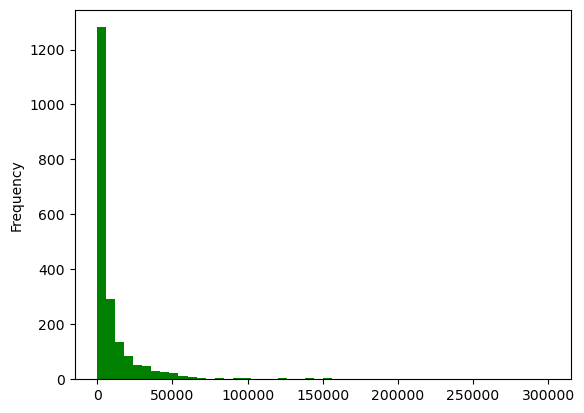

In [22]:
df_forward['Wage'].plot(kind='hist', bins=50, color='green')

<AxesSubplot:xlabel='Wage'>

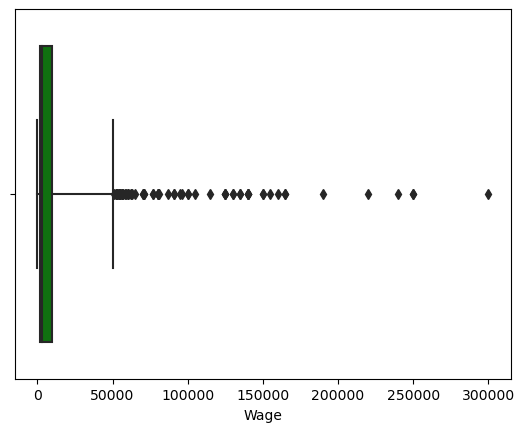

In [23]:
# To create a boxplot for the 'Wage' column. 
sns.boxplot(x='Wage', data=df_forward, whis=5, color='green')
# I see there's one strong outlier.

<AxesSubplot:ylabel='Frequency'>

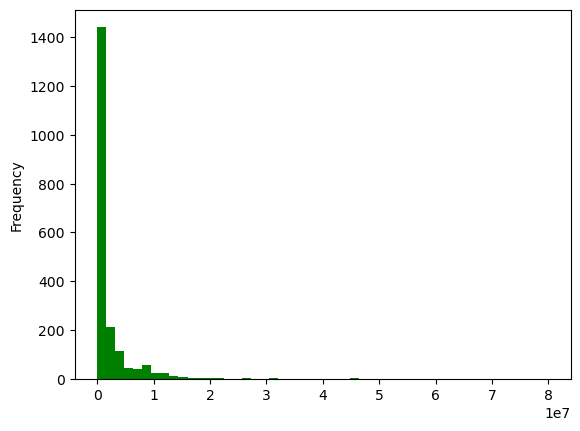

In [24]:
df_forward['Value'].plot(kind='hist', bins=50, color='green')

<AxesSubplot:xlabel='Value'>

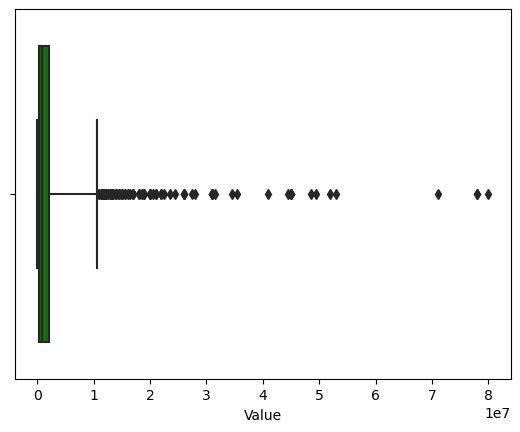

In [25]:
sns.boxplot(x='Value', data=df_forward, whis=5, color='green')

### 4. Processing Data

In [26]:
# I calculate the 95th percentile to catch the outlier in 'Wage'.
wage_threshold = df_forward['Wage'].quantile(0.95)
df_forward_filtered = df_forward[df_forward['Wage'] <= wage_threshold]

<AxesSubplot:xlabel='Wage'>

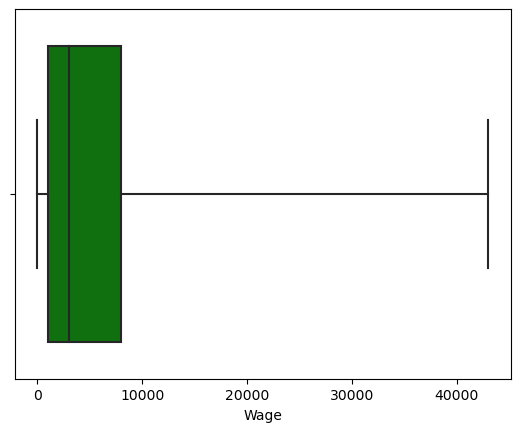

In [27]:
sns.boxplot(x='Wage', data=df_forward_filtered, whis=5, color='green')

<AxesSubplot:ylabel='Frequency'>

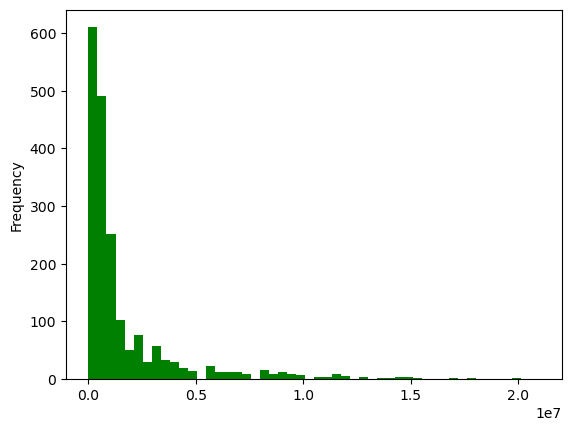

In [28]:
# Eliminating the outlier in 'Wage' also improved it in 'Value'.
df_forward_filtered['Value'].plot(kind='hist', bins=50, color='green')

<AxesSubplot:xlabel='Value'>

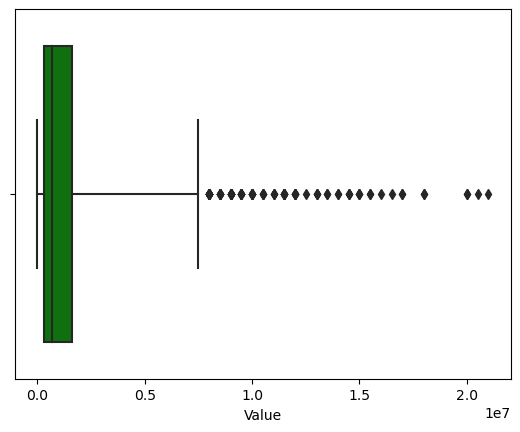

In [29]:
sns.boxplot(x='Value', data=df_forward_filtered, whis=5, color='green')

##### I create a new dataframe containing only the necessary columns for the analysis (such as player name, age, club, position, international reputation (IR), wage and market value (which will be the target value) as well as performance data from the past 5 years) to achieve a dataframe more easy to handle.
##### I want to predict the rank of real-life football players by market value, hence I focus on the real-life data in the dataset and exclude the columns related to the FIFA 21 video game such as 'Best Overall (BOV)' and 'Potential (POT)'. These columns are not directly related to a player's market value in real life and don't seem useful for my analysis.
##### Performance Data: PAC: Pace, SHO: Shooting, PAS: Passing, DRI: Dribbling, DEF: Defending, PHY: Physicality

In [30]:
df_rank = df_forward_filtered[['Name', 'Age', 'Club', 'Position', 'Wage', 'IR', 'Value', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']].copy()
df_rank.sample(5)

,Name,Age,Club,Position,Wage,IR,Value,PAC,SHO,PAS,DRI,DEF,PHY
ID,,,,,,,,,,,,,
247679,V. Boniface,19,FK Bodø/Glimt,ST,950,1,850000,78,63,50,67,25,63
244949,F. Pierrot,25,En Avant de Guingamp,ST,4000,1,1200000,65,70,50,59,28,80
226468,A. Favilli,23,Hellas Verona,ST,8000,1,1100000,63,67,45,65,24,61
251823,T. Tattermusch,19,SV Meppen,ST,500,1,110000,64,56,44,60,23,45
200433,L. Hinterseer,29,Hamburger SV,ST,13000,2,3100000,63,73,64,69,43,74


In [31]:
df_rank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1932 entries, 330 to 259105
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      1932 non-null   object
 1   Age       1932 non-null   int64 
 2   Club      1932 non-null   object
 3   Position  1932 non-null   object
 4   Wage      1932 non-null   int64 
 5   IR        1932 non-null   int64 
 6   Value     1932 non-null   int64 
 7   PAC       1932 non-null   int64 
 8   SHO       1932 non-null   int64 
 9   PAS       1932 non-null   int64 
 10  DRI       1932 non-null   int64 
 11  DEF       1932 non-null   int64 
 12  PHY       1932 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 211.3+ KB


In [32]:
summary = df_rank.describe().T
summary['iqr'] = summary['75%']-summary['25%']
summary = summary.apply(round)
summary

,count,mean,std,min,25%,50%,75%,max,iqr
Age,1932.0,25.0,5.0,16.0,21.0,24.0,29.0,53.0,8.0
Wage,1932.0,6833.0,8861.0,0.0,1000.0,3000.0,8000.0,43000.0,7000.0
IR,1932.0,1.0,0.0,1.0,1.0,1.0,1.0,5.0,0.0
Value,1932.0,1701297.0,2718976.0,0.0,325000.0,700000.0,1600000.0,21000000.0,1275000.0
PAC,1932.0,68.0,11.0,25.0,62.0,69.0,75.0,94.0,13.0
SHO,1932.0,65.0,7.0,38.0,60.0,65.0,70.0,88.0,10.0
PAS,1932.0,52.0,9.0,30.0,46.0,52.0,58.0,84.0,12.0
DRI,1932.0,64.0,7.0,43.0,59.0,64.0,68.0,89.0,9.0
DEF,1932.0,29.0,7.0,15.0,24.0,28.0,34.0,64.0,10.0
PHY,1932.0,64.0,10.0,28.0,58.0,66.0,72.0,85.0,14.0


In [33]:
num = df_rank.select_dtypes(np.number)
cat = df_rank.select_dtypes(np.object)
num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1932 entries, 330 to 259105
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     1932 non-null   int64
 1   Wage    1932 non-null   int64
 2   IR      1932 non-null   int64
 3   Value   1932 non-null   int64
 4   PAC     1932 non-null   int64
 5   SHO     1932 non-null   int64
 6   PAS     1932 non-null   int64
 7   DRI     1932 non-null   int64
 8   DEF     1932 non-null   int64
 9   PHY     1932 non-null   int64
dtypes: int64(10)
memory usage: 166.0 KB


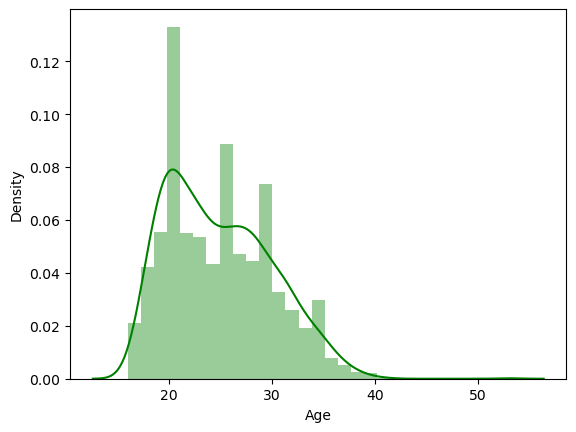

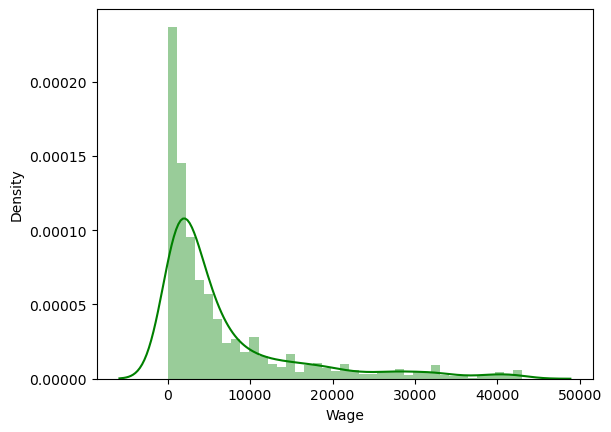

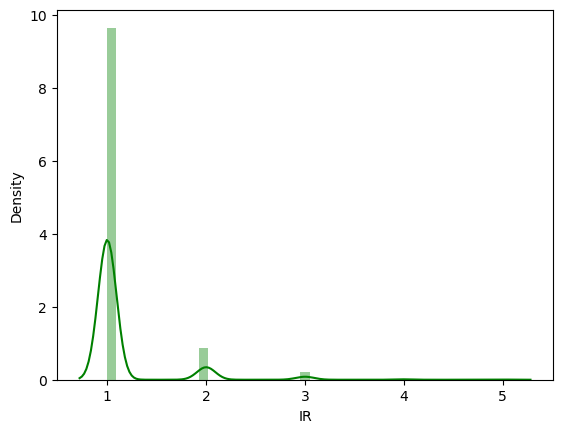

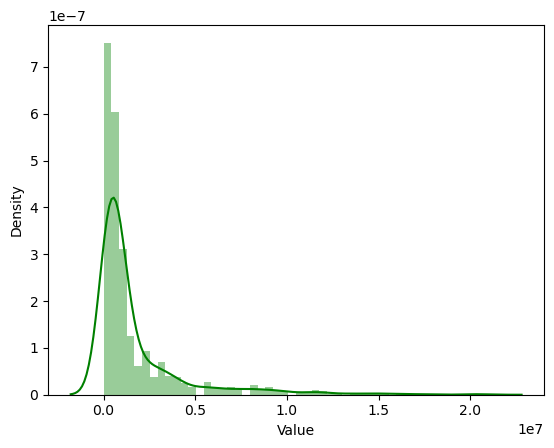

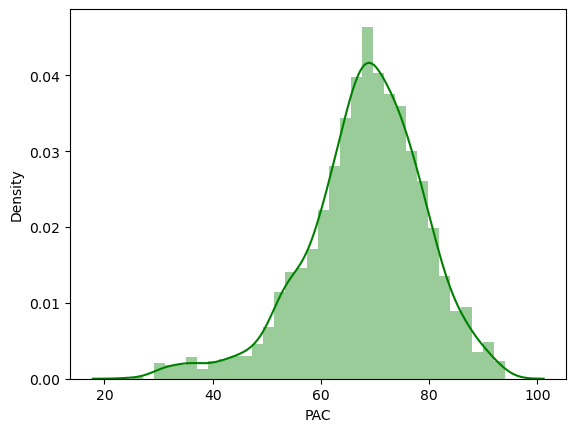

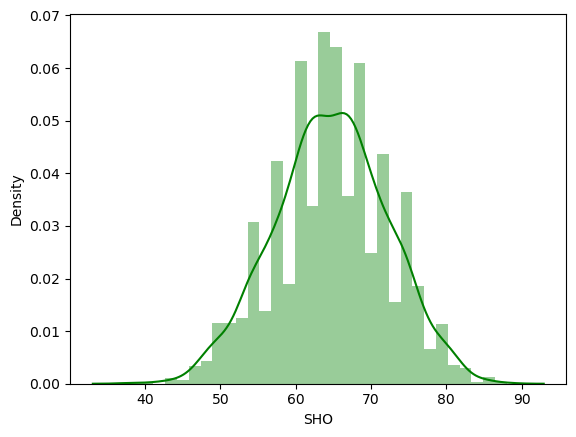

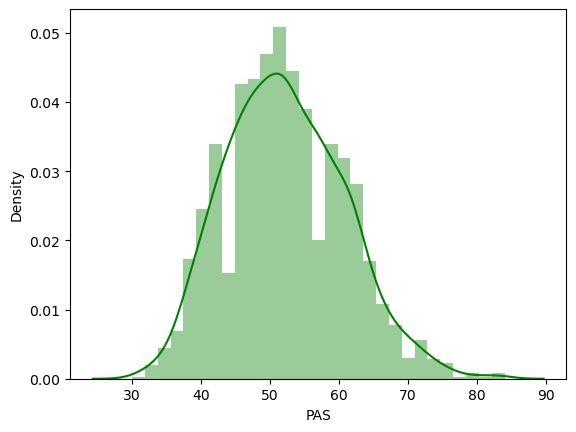

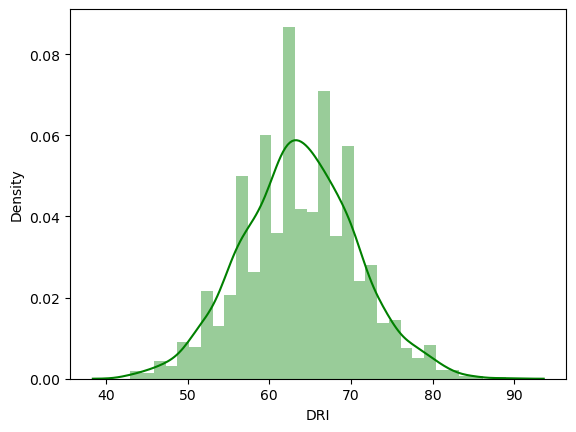

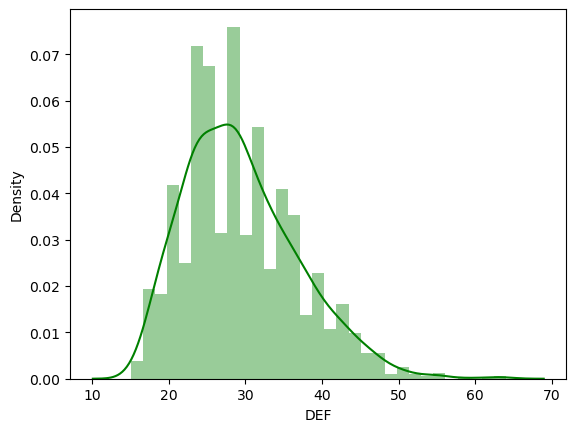

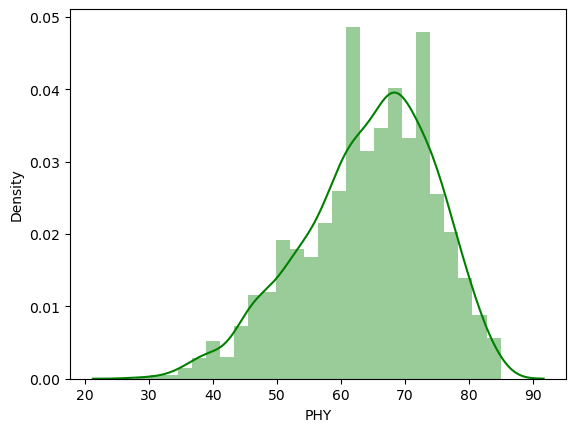

In [34]:
for column in num.columns:
    sns.distplot(num[column],color='green')
    plt.show()
    # I keep the values as they are now since the distribution looks rather normal, and only slightly skewed. 
    # Maybe after running it once I apply a transformation.

In [35]:
# To check correlations.
round(num.corr(),2)
# They all look important in relation to the target value. 
# There's little multicollinearity (no correlation higher than 0.9, but one higher than 0.75). 

,Age,Wage,IR,Value,PAC,SHO,PAS,DRI,DEF,PHY
Age,1.00,0.32,0.44,0.18,-0.26,0.61,0.51,0.35,0.45,0.53
Wage,0.32,1.00,0.30,0.68,0.03,0.62,0.51,0.52,0.34,0.35
IR,0.44,0.30,1.00,0.27,-0.14,0.42,0.43,0.33,0.26,0.17
Value,0.18,0.68,0.27,1.00,0.17,0.63,0.52,0.60,0.32,0.33
PAC,-0.26,0.03,-0.14,0.17,1.00,-0.08,0.14,0.38,-0.02,-0.13
SHO,0.61,0.62,0.42,0.63,-0.08,1.00,0.66,0.68,0.42,0.59
PAS,0.51,0.51,0.43,0.52,0.14,0.66,1.00,0.79,0.56,0.31
DRI,0.35,0.52,0.33,0.60,0.38,0.68,0.79,1.00,0.40,0.25
DEF,0.45,0.34,0.26,0.32,-0.02,0.42,0.56,0.40,1.00,0.46
PHY,0.53,0.35,0.17,0.33,-0.13,0.59,0.31,0.25,0.46,1.00


In [36]:
# I remove passing, since dribbling has a rather high correlation with it and of the two shows a slightly 
# higher one with the target.
num.drop('PAS', axis=1, inplace=True)

In [37]:
df_rank.to_csv('df_processed.csv')

In [38]:
cat.Club.nunique()

715

In [39]:
len(cat)

1932

In [40]:
# I don't want to encode the column 'Club' because there are too many different clubs in comparison to players I'm comparing for it to have any real impact on the prediction.
# I also don't want to encode the 'Name'.
cat = df_rank[['Position']] 
cat_dumm = pd.get_dummies(cat, drop_first=True)

In [41]:
df_rank_final = pd.concat([df_rank[['Name', 'Club']], cat_dumm, num], axis=1)
df_rank_final.head()

,Name,Club,Position_LW,Position_RW,Position_ST,Age,Wage,IR,Value,PAC,SHO,DRI,DEF,PHY
ID,,,,,,,,,,,,,,
330,R. Keane,LA Galaxy,0,0,1,35,10000,2,5500000,68,82,82,31,69
1198,F. Inzaghi,Milan,0,0,1,37,15000,3,350000,52,72,57,20,35
1845,O. Solskjær,Manchester United,0,0,1,34,0,2,0,64,78,75,41,57
3467,Yuri,SD Ponferradina,0,0,1,37,6000,1,850000,66,74,69,35,69
5589,Figo,Inter,0,1,0,35,0,5,0,74,77,81,46,70


In [42]:
# The first run showed very high values for RMSE, MSE and MAE. Probbaly due to the large range 
# in 'Value' and 'Wage'. So I remove outliers and observe the difference in R2.
def remove_outliers(df_rank_final, threshold=1.5, in_columns=df_rank_final.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df_rank_final[column],75)
            lower = np.percentile(df_rank_final[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            df_rank_final = df_rank_final[(df_rank_final[column]>lower_limit) & (df_rank_final[column]<upper_limit)]
    return df_rank_final
# There is no further effect on the model observed.

### 5. Applying the Model

In [43]:
y = df_rank_final['Value']
X = df_rank_final.drop(['Value', 'Name', 'Club'],axis=1)

In [44]:
# Store indices before train-test split
indices = X.index

# Applying the train/test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Store the test indices
test_indices = X_test.index

In [45]:
len(X_train)

1449

In [46]:
len(X_test)

483

In [47]:
len(y_test)

483

In [48]:
# I transform the data with the StandardScaler to see if it has an effect on the model validation.
scaler = StandardScaler() 
scaler.fit(X_train)
# Standardizing had a bad effect on the accuracy of the model. R2 became negative.

StandardScaler()

In [49]:
X_train_scaled = scaler.transform(X_train)

In [50]:
X_test_scaled = scaler.transform(X_test)

In [51]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [52]:
predictions = model.predict(X_test)

### 6. Validating the Model

In [53]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("R2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)
print("MAE = ", MAE)

R2 =  0.5888241193514832
RMSE =  1766591.691649018
MSE =  3120846205003.3394
MAE =  1138864.6735251115


### 7. Displaying Prediction

In [54]:
# I want to include the name and club again.
name_club_df = df_rank_final[['Name', 'Club']]

In [55]:
print("Shape of df_rank_final:", df_rank_final.shape)
print("Shape of df_predictions:", predictions.shape)
print("Shape of name_club_df:", name_club_df.shape)

Shape of df_rank_final: (1932, 14)
Shape of df_predictions: (483,)
Shape of name_club_df: (1932, 2)


In [59]:
# I reset the indices to adapt the different length of the datasets.
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
name_club_df_test = name_club_df.loc[test_indices].reset_index(drop=True)

# I combine the data into a single df.
current_value_df = pd.concat([name_club_df_test, X_test, y_test], axis=1)

# I add the predicted value column to the df.
current_value_df['Predicted Value'] = predictions

#  I set the floating-point formatter for the entire df to show all digits.
pd.options.display.float_format = '{:,.0f}'.format

# I display the top ten players ranked by predicted market value.
market_value_df = current_value_df[['Name', 'Club', 'Value', 'Predicted Value']].sort_values(by='Predicted Value', ascending=False).reset_index(drop=True)
market_value_df.head(10)

,Name,Club,Value,Predicted Value
0,Matheus Bardeira,São Paulo,12000000,"8,797,500"
1,André Silva,Eintracht Frankfurt,17000000,"8,533,200"
2,A. Isak,Real Sociedad,18000000,"8,376,025"
3,Fredditinho,Palmeiras,8500000,"8,266,608"
4,Ai Kesen,China PR,12000000,"8,086,106"
5,V. Janssen,Monterrey,8000000,"8,057,196"
6,C. Bakambu,Beijing Sinobo Guoan FC,15000000,"7,826,510"
7,F. Viñas,Club América,10000000,"7,610,842"
8,Mata,Getafe CF,11500000,"7,492,443"
9,Córdoba,Athletic Club de Bilbao,12000000,"7,121,270"


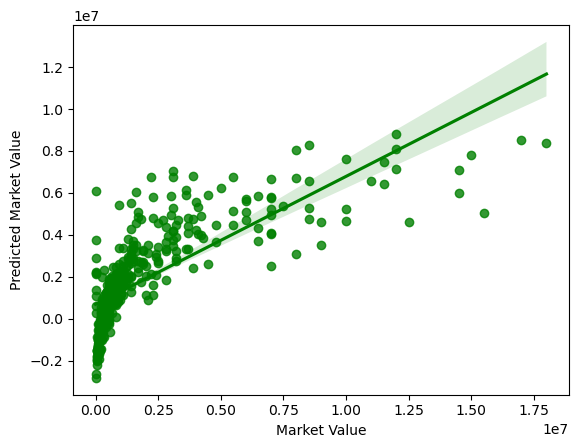

In [57]:
sns.regplot(market_value_df['Value'], market_value_df['Predicted Value'], color='green')

plt.xlabel('Market Value')
plt.ylabel('Predicted Market Value')
plt.show()

##### Outcome: It appears that average market value will increase. But for the current top ten forward players, and some others for that matter, predicted market value actually reduces.